In [90]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import platform
from tensorflow.keras import layers

In [91]:
print(platform.system())
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows' : # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

Darwin


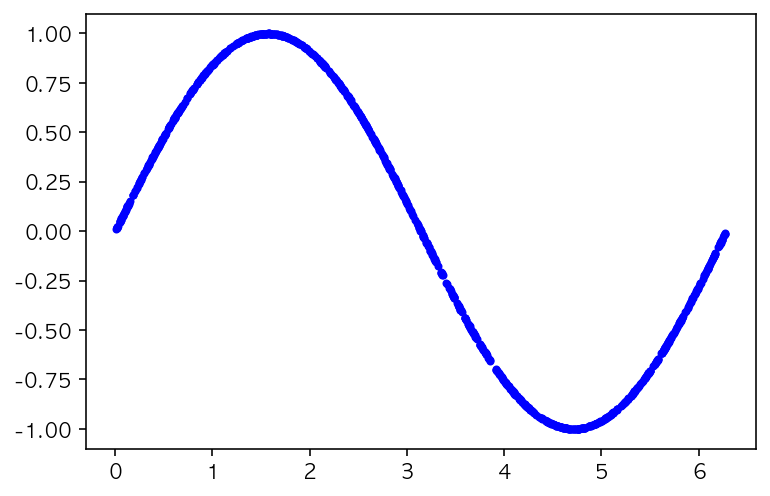

In [92]:
# 100개의 데이터 샘플을 생성합니다.
SAMPLES = 1000

# 임의의 시드값을 지정하여 이 노트북에서 실행할 때마다 다른 랜던값을 얻게 합니다.
SEED = 1357
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 사인파 진폭의 범위인 0부터 2*PI내에서 균일하게 분포된 난수 집합을 1000개 생성합니다.
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# 값을 무작위로 섞어서 생성된 값들이 딥러닝 훈련 과정에 순서를 포함하지 못하도록 합니다.
np.random.shuffle(x_values)

# 사인 값을 계산합니다.
y_values = np.sin(x_values)

# 데이터를 그래프로 그립니다. 
# 'b.'로 파란색의 그래프를 그리도록 합니다. 만일 붉은 색으로 변경한다면 'r.'과 같이 사용할 수 있습니다.
plt.plot(x_values, y_values, 'b.')
plt.show()

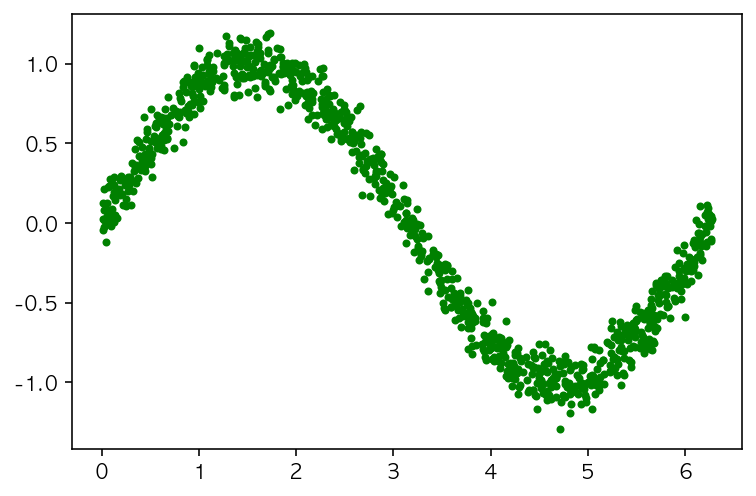

In [93]:
# 상단의 잘 그려진 sin()그래프 대신 잡음 속에서 패턴을 선별할 수 있도록 노이즈를 더하도록 합니다.
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'g.')
plt.show()

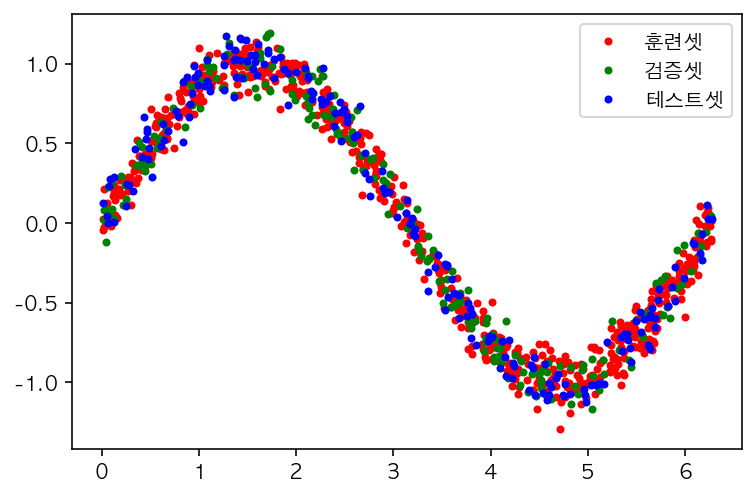

In [94]:
# 데이터셋을 훈련, 검증, 테스트의 세 부분으로 분할합니다.
# 각 셋은 훈련셋 60%, 테스트셋 20%, 검증셋 20%로 분리하도록 하겠습니다.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# np.split은 데이터를 분할할때 사용됩니다.
# np.split의 두 번째 파라미터는 데이터를 분할할 기준 인덱스 배열이므로,
# 두 개의 인덱스를 넣음으로써 훈련, 검증, 테스트의 세가지 셋으로 분할됩니다.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# 분할한 데이터를 합쳤을 때 원래 사이즈와 같은지 다시 확인합니다.
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# 분할된 각 데이터들을 다른 색상으로 그래프에 표시하도록 합니다.
plt.plot(x_train, y_train, 'r.', label="훈련셋")
plt.plot(x_validate,y_validate, 'g.', label="검증셋")
plt.plot(x_test, y_test, 'b.', label="테스트셋")
plt.legend()
plt.show()


In [95]:
# 케라스를 이용하여 순차적 모델을 생성합니다.
model_1 = tf.keras.Sequential()

# 단일 입력(x값)과 16개의 뉴런이 있는 Dense 레이어(fully connected Layer라고도 함)를 생성합니다.
# 예측할 때 입력이 뉴런의 모든 단일 뉴런으로 전달됨을 의미합니다.
model_1.add(layers.Dense(16, activation = 'relu', input_shape=(1,)))

# 위 첫 번째 레이어에서 출력된 활성화 값은 아래에서 정의한 레이어의 입력으로 전달됩니다.
# 이 레이어는 단일 뉴런이므로 이전 레이어의 각 뉴런마다 하나씩 16개의 입력을 받아 이전 레이어의 모든 활성화 값을
# 단일 출력으로 결합하게 합니다.
model_1.add(layers.Dense(1))

# 1. 훈련중에 네트워크가 입력을 모델링하도록 조정하는 알고리즘으로 optimizer에 rmsprop을 지정합니다.
# 2. 손실인수 loss는 훈련 과정에서 네트워크 예측이 실제값에서 얼마나 멀리 떨여져 있는지 계산하기 위한 값으로
#    여기서는 평균 제곱 오차법(Mean Squared Error)을 사용합니다.
#    이 손실함수는 숫자를 예측하는 회귀 문제에 주로 쓰입니다.
# 3. 모델의 성능을 판단하기 위해 metrics에 평균 절대 오차법(Mean Absolute Error)을 사용합니다.
model_1.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

# 모델 아키텍처의 요약 정보를 출력합니다.
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [96]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))



Epoch 1/1000
38/38 [==============================] - 0s 2ms/step - loss: 2.4726 - mae: 1.2824 - val_loss: 1.1765 - val_mae: 0.9286
Epoch 2/1000
38/38 [==============================] - 0s 924us/step - loss: 0.8920 - mae: 0.8522 - val_loss: 0.5841 - val_mae: 0.6898
Epoch 3/1000
38/38 [==============================] - 0s 928us/step - loss: 0.5165 - mae: 0.6346 - val_loss: 0.4872 - val_mae: 0.5930
Epoch 4/1000
38/38 [==============================] - 0s 891us/step - loss: 0.4413 - mae: 0.5734 - val_loss: 0.4251 - val_mae: 0.5499
Epoch 5/1000
38/38 [==============================] - 0s 906us/step - loss: 0.3851 - mae: 0.5345 - val_loss: 0.3716 - val_mae: 0.5221
Epoch 6/1000
38/38 [==============================] - 0s 897us/step - loss: 0.3414 - mae: 0.5061 - val_loss: 0.3304 - val_mae: 0.4856
Epoch 7/1000
38/38 [==============================] - 0s 891us/step - loss: 0.3001 - mae: 0.4728 - val_loss: 0.2908 - val_mae: 0.4608
Epoch 8/1000
38/38 [==============================] - 0s 883us/s

Epoch 62/1000
38/38 [==============================] - 0s 922us/step - loss: 0.1597 - mae: 0.3248 - val_loss: 0.1484 - val_mae: 0.3235
Epoch 63/1000
38/38 [==============================] - 0s 966us/step - loss: 0.1599 - mae: 0.3250 - val_loss: 0.1484 - val_mae: 0.3234
Epoch 64/1000
38/38 [==============================] - 0s 917us/step - loss: 0.1592 - mae: 0.3226 - val_loss: 0.1494 - val_mae: 0.3229
Epoch 65/1000
38/38 [==============================] - 0s 875us/step - loss: 0.1585 - mae: 0.3221 - val_loss: 0.1488 - val_mae: 0.3227
Epoch 66/1000
38/38 [==============================] - 0s 868us/step - loss: 0.1594 - mae: 0.3246 - val_loss: 0.1486 - val_mae: 0.3232
Epoch 67/1000
38/38 [==============================] - 0s 872us/step - loss: 0.1586 - mae: 0.3239 - val_loss: 0.1553 - val_mae: 0.3255
Epoch 68/1000
38/38 [==============================] - 0s 870us/step - loss: 0.1617 - mae: 0.3258 - val_loss: 0.1492 - val_mae: 0.3231
Epoch 69/1000
38/38 [==============================] - 

38/38 [==============================] - 0s 865us/step - loss: 0.1586 - mae: 0.3215 - val_loss: 0.1464 - val_mae: 0.3181
Epoch 123/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1580 - mae: 0.3223 - val_loss: 0.1460 - val_mae: 0.3174
Epoch 124/1000
38/38 [==============================] - 0s 846us/step - loss: 0.1584 - mae: 0.3209 - val_loss: 0.1515 - val_mae: 0.3195
Epoch 125/1000
38/38 [==============================] - 0s 884us/step - loss: 0.1593 - mae: 0.3184 - val_loss: 0.1524 - val_mae: 0.3195
Epoch 126/1000
38/38 [==============================] - 0s 845us/step - loss: 0.1571 - mae: 0.3202 - val_loss: 0.1469 - val_mae: 0.3167
Epoch 127/1000
38/38 [==============================] - 0s 862us/step - loss: 0.1573 - mae: 0.3207 - val_loss: 0.1466 - val_mae: 0.3167
Epoch 128/1000
38/38 [==============================] - 0s 879us/step - loss: 0.1581 - mae: 0.3195 - val_loss: 0.1464 - val_mae: 0.3175
Epoch 129/1000
38/38 [==============================] - 0s 878u

38/38 [==============================] - 0s 913us/step - loss: 0.1570 - mae: 0.3174 - val_loss: 0.1448 - val_mae: 0.3138
Epoch 183/1000
38/38 [==============================] - 0s 874us/step - loss: 0.1584 - mae: 0.3172 - val_loss: 0.1470 - val_mae: 0.3148
Epoch 184/1000
38/38 [==============================] - 0s 880us/step - loss: 0.1576 - mae: 0.3179 - val_loss: 0.1521 - val_mae: 0.3170
Epoch 185/1000
38/38 [==============================] - 0s 897us/step - loss: 0.1583 - mae: 0.3190 - val_loss: 0.1449 - val_mae: 0.3138
Epoch 186/1000
38/38 [==============================] - 0s 891us/step - loss: 0.1585 - mae: 0.3177 - val_loss: 0.1452 - val_mae: 0.3135
Epoch 187/1000
38/38 [==============================] - 0s 854us/step - loss: 0.1589 - mae: 0.3181 - val_loss: 0.1456 - val_mae: 0.3144
Epoch 188/1000
38/38 [==============================] - 0s 889us/step - loss: 0.1580 - mae: 0.3158 - val_loss: 0.1447 - val_mae: 0.3135
Epoch 189/1000
38/38 [==============================] - 0s 887u

38/38 [==============================] - 0s 873us/step - loss: 0.1547 - mae: 0.3141 - val_loss: 0.1444 - val_mae: 0.3123
Epoch 243/1000
38/38 [==============================] - 0s 886us/step - loss: 0.1573 - mae: 0.3164 - val_loss: 0.1445 - val_mae: 0.3121
Epoch 244/1000
38/38 [==============================] - 0s 890us/step - loss: 0.1566 - mae: 0.3149 - val_loss: 0.1493 - val_mae: 0.3140
Epoch 245/1000
38/38 [==============================] - 0s 884us/step - loss: 0.1573 - mae: 0.3160 - val_loss: 0.1448 - val_mae: 0.3128
Epoch 246/1000
38/38 [==============================] - 0s 860us/step - loss: 0.1573 - mae: 0.3172 - val_loss: 0.1480 - val_mae: 0.3138
Epoch 247/1000
38/38 [==============================] - 0s 883us/step - loss: 0.1553 - mae: 0.3147 - val_loss: 0.1445 - val_mae: 0.3122
Epoch 248/1000
38/38 [==============================] - 0s 865us/step - loss: 0.1558 - mae: 0.3144 - val_loss: 0.1558 - val_mae: 0.3177
Epoch 249/1000
38/38 [==============================] - 0s 863u

38/38 [==============================] - 0s 893us/step - loss: 0.1570 - mae: 0.3148 - val_loss: 0.1435 - val_mae: 0.3093
Epoch 303/1000
38/38 [==============================] - 0s 870us/step - loss: 0.1573 - mae: 0.3151 - val_loss: 0.1433 - val_mae: 0.3092
Epoch 304/1000
38/38 [==============================] - 0s 878us/step - loss: 0.1569 - mae: 0.3142 - val_loss: 0.1505 - val_mae: 0.3123
Epoch 305/1000
38/38 [==============================] - 0s 861us/step - loss: 0.1549 - mae: 0.3122 - val_loss: 0.1573 - val_mae: 0.3167
Epoch 306/1000
38/38 [==============================] - 0s 890us/step - loss: 0.1578 - mae: 0.3154 - val_loss: 0.1441 - val_mae: 0.3103
Epoch 307/1000
38/38 [==============================] - 0s 857us/step - loss: 0.1585 - mae: 0.3159 - val_loss: 0.1456 - val_mae: 0.3107
Epoch 308/1000
38/38 [==============================] - 0s 894us/step - loss: 0.1556 - mae: 0.3135 - val_loss: 0.1522 - val_mae: 0.3136
Epoch 309/1000
38/38 [==============================] - 0s 867u

38/38 [==============================] - 0s 892us/step - loss: 0.1558 - mae: 0.3124 - val_loss: 0.1446 - val_mae: 0.3087
Epoch 363/1000
38/38 [==============================] - 0s 887us/step - loss: 0.1569 - mae: 0.3137 - val_loss: 0.1430 - val_mae: 0.3083
Epoch 364/1000
38/38 [==============================] - 0s 872us/step - loss: 0.1565 - mae: 0.3133 - val_loss: 0.1432 - val_mae: 0.3083
Epoch 365/1000
38/38 [==============================] - 0s 891us/step - loss: 0.1547 - mae: 0.3123 - val_loss: 0.1434 - val_mae: 0.3085
Epoch 366/1000
38/38 [==============================] - 0s 856us/step - loss: 0.1563 - mae: 0.3126 - val_loss: 0.1454 - val_mae: 0.3093
Epoch 367/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1566 - mae: 0.3140 - val_loss: 0.1430 - val_mae: 0.3089
Epoch 368/1000
38/38 [==============================] - 0s 859us/step - loss: 0.1578 - mae: 0.3137 - val_loss: 0.1433 - val_mae: 0.3087
Epoch 369/1000
38/38 [==============================] - 0s 892u

38/38 [==============================] - 0s 888us/step - loss: 0.1550 - mae: 0.3089 - val_loss: 0.1427 - val_mae: 0.3071
Epoch 423/1000
38/38 [==============================] - 0s 877us/step - loss: 0.1566 - mae: 0.3125 - val_loss: 0.1437 - val_mae: 0.3076
Epoch 424/1000
38/38 [==============================] - 0s 861us/step - loss: 0.1562 - mae: 0.3123 - val_loss: 0.1446 - val_mae: 0.3074
Epoch 425/1000
38/38 [==============================] - 0s 903us/step - loss: 0.1573 - mae: 0.3147 - val_loss: 0.1428 - val_mae: 0.3069
Epoch 426/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1563 - mae: 0.3117 - val_loss: 0.1497 - val_mae: 0.3094
Epoch 427/1000
38/38 [==============================] - 0s 855us/step - loss: 0.1550 - mae: 0.3137 - val_loss: 0.1449 - val_mae: 0.3068
Epoch 428/1000
38/38 [==============================] - 0s 858us/step - loss: 0.1580 - mae: 0.3132 - val_loss: 0.1423 - val_mae: 0.3067
Epoch 429/1000
38/38 [==============================] - 0s 859u

38/38 [==============================] - 0s 883us/step - loss: 0.1562 - mae: 0.3117 - val_loss: 0.1430 - val_mae: 0.3061
Epoch 483/1000
38/38 [==============================] - 0s 899us/step - loss: 0.1561 - mae: 0.3133 - val_loss: 0.1426 - val_mae: 0.3062
Epoch 484/1000
38/38 [==============================] - 0s 870us/step - loss: 0.1554 - mae: 0.3113 - val_loss: 0.1480 - val_mae: 0.3080
Epoch 485/1000
38/38 [==============================] - 0s 871us/step - loss: 0.1570 - mae: 0.3123 - val_loss: 0.1428 - val_mae: 0.3061
Epoch 486/1000
38/38 [==============================] - 0s 880us/step - loss: 0.1565 - mae: 0.3123 - val_loss: 0.1433 - val_mae: 0.3060
Epoch 487/1000
38/38 [==============================] - 0s 882us/step - loss: 0.1564 - mae: 0.3116 - val_loss: 0.1423 - val_mae: 0.3058
Epoch 488/1000
38/38 [==============================] - 0s 892us/step - loss: 0.1558 - mae: 0.3113 - val_loss: 0.1424 - val_mae: 0.3058
Epoch 489/1000
38/38 [==============================] - 0s 895u

38/38 [==============================] - 0s 883us/step - loss: 0.1540 - mae: 0.3078 - val_loss: 0.1422 - val_mae: 0.3050
Epoch 543/1000
38/38 [==============================] - 0s 901us/step - loss: 0.1564 - mae: 0.3117 - val_loss: 0.1468 - val_mae: 0.3054
Epoch 544/1000
38/38 [==============================] - 0s 893us/step - loss: 0.1570 - mae: 0.3127 - val_loss: 0.1423 - val_mae: 0.3041
Epoch 545/1000
38/38 [==============================] - 0s 896us/step - loss: 0.1545 - mae: 0.3113 - val_loss: 0.1485 - val_mae: 0.3055
Epoch 546/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1553 - mae: 0.3095 - val_loss: 0.1429 - val_mae: 0.3046
Epoch 547/1000
38/38 [==============================] - 0s 863us/step - loss: 0.1556 - mae: 0.3102 - val_loss: 0.1417 - val_mae: 0.3047
Epoch 548/1000
38/38 [==============================] - 0s 870us/step - loss: 0.1563 - mae: 0.3109 - val_loss: 0.1424 - val_mae: 0.3049
Epoch 549/1000
38/38 [==============================] - 0s 851u

38/38 [==============================] - 0s 888us/step - loss: 0.1567 - mae: 0.3131 - val_loss: 0.1504 - val_mae: 0.3082
Epoch 603/1000
38/38 [==============================] - 0s 886us/step - loss: 0.1560 - mae: 0.3101 - val_loss: 0.1434 - val_mae: 0.3051
Epoch 604/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1573 - mae: 0.3125 - val_loss: 0.1417 - val_mae: 0.3045
Epoch 605/1000
38/38 [==============================] - 0s 886us/step - loss: 0.1567 - mae: 0.3120 - val_loss: 0.1418 - val_mae: 0.3043
Epoch 606/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1571 - mae: 0.3122 - val_loss: 0.1428 - val_mae: 0.3046
Epoch 607/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1558 - mae: 0.3099 - val_loss: 0.1493 - val_mae: 0.3073
Epoch 608/1000
38/38 [==============================] - 0s 878us/step - loss: 0.1556 - mae: 0.3091 - val_loss: 0.1569 - val_mae: 0.3119
Epoch 609/1000
38/38 [==============================] - 0s 899u

38/38 [==============================] - 0s 939us/step - loss: 0.1560 - mae: 0.3093 - val_loss: 0.1426 - val_mae: 0.3039
Epoch 663/1000
38/38 [==============================] - 0s 946us/step - loss: 0.1574 - mae: 0.3120 - val_loss: 0.1424 - val_mae: 0.3039
Epoch 664/1000
38/38 [==============================] - 0s 917us/step - loss: 0.1571 - mae: 0.3105 - val_loss: 0.1478 - val_mae: 0.3060
Epoch 665/1000
38/38 [==============================] - 0s 917us/step - loss: 0.1546 - mae: 0.3106 - val_loss: 0.1496 - val_mae: 0.3070
Epoch 666/1000
38/38 [==============================] - 0s 938us/step - loss: 0.1554 - mae: 0.3093 - val_loss: 0.1461 - val_mae: 0.3053
Epoch 667/1000
38/38 [==============================] - 0s 906us/step - loss: 0.1557 - mae: 0.3114 - val_loss: 0.1420 - val_mae: 0.3038
Epoch 668/1000
38/38 [==============================] - 0s 893us/step - loss: 0.1573 - mae: 0.3113 - val_loss: 0.1469 - val_mae: 0.3054
Epoch 669/1000
38/38 [==============================] - 0s 898u

38/38 [==============================] - 0s 886us/step - loss: 0.1563 - mae: 0.3104 - val_loss: 0.1430 - val_mae: 0.3041
Epoch 723/1000
38/38 [==============================] - 0s 888us/step - loss: 0.1553 - mae: 0.3102 - val_loss: 0.1550 - val_mae: 0.3104
Epoch 724/1000
38/38 [==============================] - 0s 873us/step - loss: 0.1564 - mae: 0.3119 - val_loss: 0.1436 - val_mae: 0.3043
Epoch 725/1000
38/38 [==============================] - 0s 881us/step - loss: 0.1552 - mae: 0.3107 - val_loss: 0.1414 - val_mae: 0.3037
Epoch 726/1000
38/38 [==============================] - 0s 870us/step - loss: 0.1562 - mae: 0.3104 - val_loss: 0.1518 - val_mae: 0.3081
Epoch 727/1000
38/38 [==============================] - 0s 868us/step - loss: 0.1550 - mae: 0.3112 - val_loss: 0.1448 - val_mae: 0.3044
Epoch 728/1000
38/38 [==============================] - 0s 902us/step - loss: 0.1566 - mae: 0.3118 - val_loss: 0.1414 - val_mae: 0.3032
Epoch 729/1000
38/38 [==============================] - 0s 900u

38/38 [==============================] - 0s 886us/step - loss: 0.1551 - mae: 0.3088 - val_loss: 0.1411 - val_mae: 0.3022
Epoch 783/1000
38/38 [==============================] - 0s 899us/step - loss: 0.1567 - mae: 0.3096 - val_loss: 0.1463 - val_mae: 0.3043
Epoch 784/1000
38/38 [==============================] - 0s 905us/step - loss: 0.1558 - mae: 0.3102 - val_loss: 0.1416 - val_mae: 0.3028
Epoch 785/1000
38/38 [==============================] - 0s 858us/step - loss: 0.1561 - mae: 0.3104 - val_loss: 0.1477 - val_mae: 0.3052
Epoch 786/1000
38/38 [==============================] - 0s 898us/step - loss: 0.1566 - mae: 0.3108 - val_loss: 0.1490 - val_mae: 0.3059
Epoch 787/1000
38/38 [==============================] - 0s 874us/step - loss: 0.1569 - mae: 0.3103 - val_loss: 0.1421 - val_mae: 0.3028
Epoch 788/1000
38/38 [==============================] - 0s 898us/step - loss: 0.1559 - mae: 0.3096 - val_loss: 0.1414 - val_mae: 0.3028
Epoch 789/1000
38/38 [==============================] - 0s 901u

38/38 [==============================] - 0s 913us/step - loss: 0.1551 - mae: 0.3092 - val_loss: 0.1547 - val_mae: 0.3092
Epoch 843/1000
38/38 [==============================] - 0s 874us/step - loss: 0.1550 - mae: 0.3089 - val_loss: 0.1480 - val_mae: 0.3051
Epoch 844/1000
38/38 [==============================] - 0s 865us/step - loss: 0.1570 - mae: 0.3110 - val_loss: 0.1466 - val_mae: 0.3045
Epoch 845/1000
38/38 [==============================] - 0s 882us/step - loss: 0.1555 - mae: 0.3098 - val_loss: 0.1422 - val_mae: 0.3023
Epoch 846/1000
38/38 [==============================] - 0s 911us/step - loss: 0.1538 - mae: 0.3061 - val_loss: 0.1416 - val_mae: 0.3033
Epoch 847/1000
38/38 [==============================] - 0s 910us/step - loss: 0.1561 - mae: 0.3105 - val_loss: 0.1483 - val_mae: 0.3054
Epoch 848/1000
38/38 [==============================] - 0s 867us/step - loss: 0.1553 - mae: 0.3092 - val_loss: 0.1416 - val_mae: 0.3034
Epoch 849/1000
38/38 [==============================] - 0s 863u

38/38 [==============================] - 0s 875us/step - loss: 0.1542 - mae: 0.3100 - val_loss: 0.1467 - val_mae: 0.3044
Epoch 903/1000
38/38 [==============================] - 0s 916us/step - loss: 0.1546 - mae: 0.3084 - val_loss: 0.1474 - val_mae: 0.3048
Epoch 904/1000
38/38 [==============================] - 0s 866us/step - loss: 0.1565 - mae: 0.3100 - val_loss: 0.1428 - val_mae: 0.3033
Epoch 905/1000
38/38 [==============================] - 0s 883us/step - loss: 0.1547 - mae: 0.3096 - val_loss: 0.1502 - val_mae: 0.3065
Epoch 906/1000
38/38 [==============================] - 0s 892us/step - loss: 0.1550 - mae: 0.3088 - val_loss: 0.1526 - val_mae: 0.3080
Epoch 907/1000
38/38 [==============================] - 0s 864us/step - loss: 0.1571 - mae: 0.3112 - val_loss: 0.1436 - val_mae: 0.3036
Epoch 908/1000
38/38 [==============================] - 0s 860us/step - loss: 0.1564 - mae: 0.3089 - val_loss: 0.1413 - val_mae: 0.3029
Epoch 909/1000
38/38 [==============================] - 0s 878u

38/38 [==============================] - 0s 890us/step - loss: 0.1572 - mae: 0.3099 - val_loss: 0.1411 - val_mae: 0.3025
Epoch 963/1000
38/38 [==============================] - 0s 879us/step - loss: 0.1560 - mae: 0.3085 - val_loss: 0.1419 - val_mae: 0.3028
Epoch 964/1000
38/38 [==============================] - 0s 874us/step - loss: 0.1550 - mae: 0.3084 - val_loss: 0.1425 - val_mae: 0.3027
Epoch 965/1000
38/38 [==============================] - 0s 872us/step - loss: 0.1569 - mae: 0.3096 - val_loss: 0.1428 - val_mae: 0.3025
Epoch 966/1000
38/38 [==============================] - 0s 892us/step - loss: 0.1565 - mae: 0.3094 - val_loss: 0.1527 - val_mae: 0.3076
Epoch 967/1000
38/38 [==============================] - 0s 897us/step - loss: 0.1559 - mae: 0.3110 - val_loss: 0.1411 - val_mae: 0.3017
Epoch 968/1000
38/38 [==============================] - 0s 891us/step - loss: 0.1543 - mae: 0.3070 - val_loss: 0.1419 - val_mae: 0.3023
Epoch 969/1000
38/38 [==============================] - 0s 883u

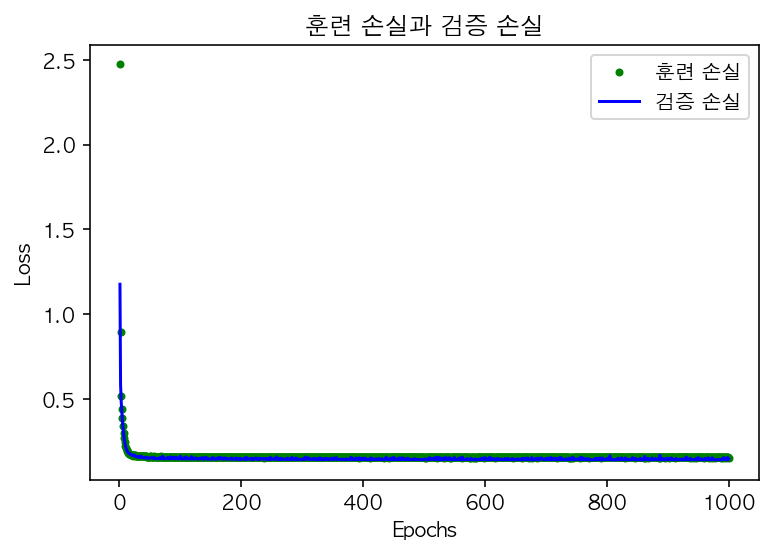

In [97]:

def show_loss_graph(loss, val_loss, epochs) :
    plt.plot(epochs, loss, 'g.', label='훈련 손실')
    plt.plot(epochs, val_loss, 'b', label='검증 손실')
    plt.title('훈련 손실과 검증 손실')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def show_skip_loss_graph(loss, val_loss, epochs) :
    SKIP = 100
    
    plt.clf()
    plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='훈련 손실')
    plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='검증 손실')
    plt.title('훈련 손실과 검증 손실')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

show_loss_graph(loss, val_loss, epochs)


*처음 100개의 Epoch을 건너뛰어 그래프를 더 읽기 쉽게 만듭니다.*

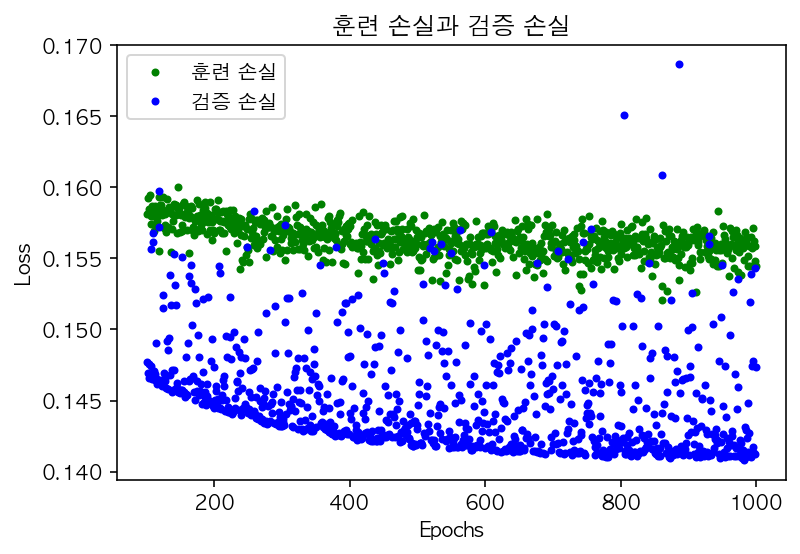

In [98]:
show_skip_loss_graph(loss, val_loss, epochs)

*예측에서 오차를 측정하는 또 다른 방법인 평균 절대 오차 그래프를 그려보겠습니다.*

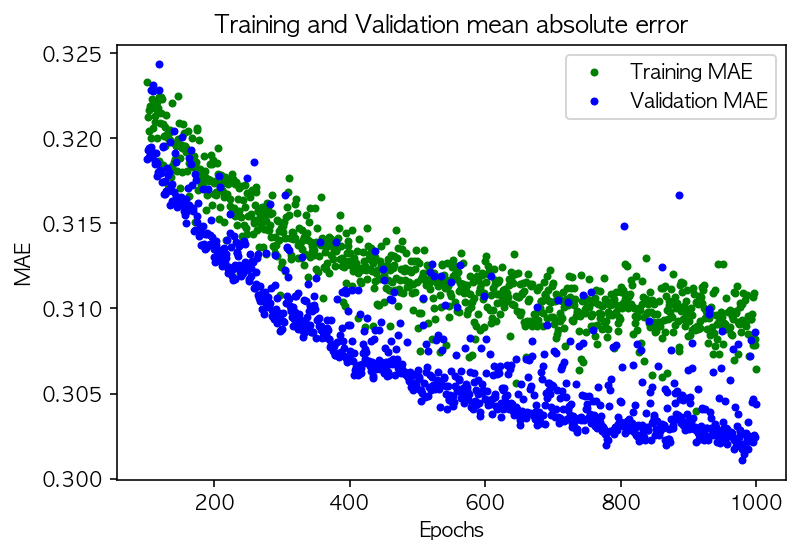

In [99]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

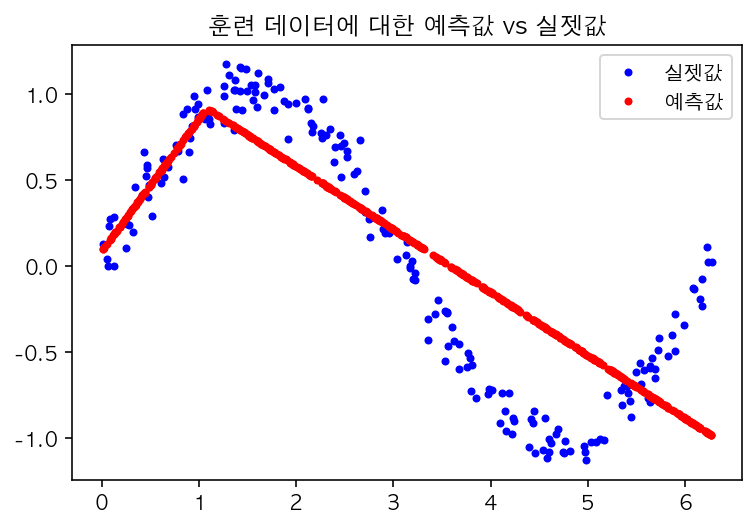

In [100]:
# 모델에서 검증 데이터로 예측을 합니다.
predictions = model_1.predict(x_train)

# 테스트 데이터와 함께 위에서 예측한 값을 그래프로 표현합니다.
plt.clf()
plt.title('훈련 데이터에 대한 예측값 vs 실젯값')
plt.plot(x_test, y_test, 'b.' , label='실젯값')
plt.plot(x_train, predictions, 'r.', label='예측값')
plt.legend()
plt.show()

위 그래프는 이전에 생성한 모델(model_1)이 너무 작아서 사인 함수의 데이터에 대한 복잡성을 배우기 어렵다는 사실을 의미한다.
그러므로 다른 뉴런 레이어를 추가해서 좀 더 예상 출력에 가깝게 만들어야 한다.


In [101]:
model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


위 모델의 요약을 보면 기존 model_1과 거의 유사하다. 다만 좀더 데이터의 복잡성을 학습할 수 있도록 중간에 Dense 레이어를 하나 더 추가했다.


In [102]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))


Epoch 1/600
38/38 [==============================] - 0s 4ms/step - loss: 0.3922 - mae: 0.5518 - val_loss: 0.3512 - val_mae: 0.5068
Epoch 2/600
38/38 [==============================] - 0s 972us/step - loss: 0.3132 - mae: 0.4854 - val_loss: 0.2910 - val_mae: 0.4616
Epoch 3/600
38/38 [==============================] - 0s 922us/step - loss: 0.2594 - mae: 0.4433 - val_loss: 0.2435 - val_mae: 0.4266
Epoch 4/600
38/38 [==============================] - 0s 912us/step - loss: 0.2185 - mae: 0.4080 - val_loss: 0.2058 - val_mae: 0.3972
Epoch 5/600
38/38 [==============================] - 0s 915us/step - loss: 0.1863 - mae: 0.3767 - val_loss: 0.1853 - val_mae: 0.3800
Epoch 6/600
38/38 [==============================] - 0s 915us/step - loss: 0.1681 - mae: 0.3559 - val_loss: 0.1648 - val_mae: 0.3601
Epoch 7/600
38/38 [==============================] - 0s 920us/step - loss: 0.1569 - mae: 0.3406 - val_loss: 0.1576 - val_mae: 0.3516
Epoch 8/600
38/38 [==============================] - 0s 916us/step - lo

38/38 [==============================] - 0s 996us/step - loss: 0.0301 - mae: 0.1266 - val_loss: 0.0253 - val_mae: 0.1211
Epoch 63/600
38/38 [==============================] - 0s 970us/step - loss: 0.0286 - mae: 0.1238 - val_loss: 0.0250 - val_mae: 0.1184
Epoch 64/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0281 - mae: 0.1213 - val_loss: 0.0254 - val_mae: 0.1213
Epoch 65/600
38/38 [==============================] - 0s 987us/step - loss: 0.0265 - mae: 0.1191 - val_loss: 0.0241 - val_mae: 0.1227
Epoch 66/600
38/38 [==============================] - 0s 984us/step - loss: 0.0264 - mae: 0.1185 - val_loss: 0.0239 - val_mae: 0.1223
Epoch 67/600
38/38 [==============================] - 0s 994us/step - loss: 0.0248 - mae: 0.1152 - val_loss: 0.0229 - val_mae: 0.1169
Epoch 68/600
38/38 [==============================] - 0s 953us/step - loss: 0.0248 - mae: 0.1162 - val_loss: 0.0210 - val_mae: 0.1109
Epoch 69/600
38/38 [==============================] - 0s 957us/step - loss: 0

38/38 [==============================] - 0s 918us/step - loss: 0.0108 - mae: 0.0832 - val_loss: 0.0119 - val_mae: 0.0899
Epoch 124/600
38/38 [==============================] - 0s 952us/step - loss: 0.0108 - mae: 0.0824 - val_loss: 0.0114 - val_mae: 0.0883
Epoch 125/600
38/38 [==============================] - 0s 882us/step - loss: 0.0108 - mae: 0.0829 - val_loss: 0.0126 - val_mae: 0.0903
Epoch 126/600
38/38 [==============================] - 0s 885us/step - loss: 0.0107 - mae: 0.0831 - val_loss: 0.0121 - val_mae: 0.0883
Epoch 127/600
38/38 [==============================] - 0s 888us/step - loss: 0.0112 - mae: 0.0856 - val_loss: 0.0114 - val_mae: 0.0870
Epoch 128/600
38/38 [==============================] - 0s 901us/step - loss: 0.0105 - mae: 0.0828 - val_loss: 0.0195 - val_mae: 0.1120
Epoch 129/600
38/38 [==============================] - 0s 891us/step - loss: 0.0105 - mae: 0.0816 - val_loss: 0.0106 - val_mae: 0.0840
Epoch 130/600
38/38 [==============================] - 0s 932us/step 

Epoch 184/600
38/38 [==============================] - 0s 958us/step - loss: 0.0106 - mae: 0.0822 - val_loss: 0.0109 - val_mae: 0.0843
Epoch 185/600
38/38 [==============================] - 0s 902us/step - loss: 0.0107 - mae: 0.0815 - val_loss: 0.0116 - val_mae: 0.0898
Epoch 186/600
38/38 [==============================] - 0s 896us/step - loss: 0.0102 - mae: 0.0793 - val_loss: 0.0113 - val_mae: 0.0877
Epoch 187/600
38/38 [==============================] - 0s 896us/step - loss: 0.0107 - mae: 0.0827 - val_loss: 0.0115 - val_mae: 0.0875
Epoch 188/600
38/38 [==============================] - 0s 897us/step - loss: 0.0100 - mae: 0.0799 - val_loss: 0.0104 - val_mae: 0.0843
Epoch 189/600
38/38 [==============================] - 0s 913us/step - loss: 0.0104 - mae: 0.0809 - val_loss: 0.0141 - val_mae: 0.0977
Epoch 190/600
38/38 [==============================] - 0s 912us/step - loss: 0.0106 - mae: 0.0821 - val_loss: 0.0117 - val_mae: 0.0865
Epoch 191/600
38/38 [==============================] - 

Epoch 245/600
38/38 [==============================] - 0s 904us/step - loss: 0.0101 - mae: 0.0804 - val_loss: 0.0121 - val_mae: 0.0883
Epoch 246/600
38/38 [==============================] - 0s 907us/step - loss: 0.0100 - mae: 0.0800 - val_loss: 0.0127 - val_mae: 0.0922
Epoch 247/600
38/38 [==============================] - 0s 895us/step - loss: 0.0101 - mae: 0.0797 - val_loss: 0.0119 - val_mae: 0.0918
Epoch 248/600
38/38 [==============================] - 0s 880us/step - loss: 0.0101 - mae: 0.0804 - val_loss: 0.0125 - val_mae: 0.0905
Epoch 249/600
38/38 [==============================] - 0s 901us/step - loss: 0.0103 - mae: 0.0813 - val_loss: 0.0107 - val_mae: 0.0841
Epoch 250/600
38/38 [==============================] - 0s 913us/step - loss: 0.0105 - mae: 0.0818 - val_loss: 0.0114 - val_mae: 0.0882
Epoch 251/600
38/38 [==============================] - 0s 903us/step - loss: 0.0104 - mae: 0.0824 - val_loss: 0.0124 - val_mae: 0.0887
Epoch 252/600
38/38 [==============================] - 

Epoch 306/600
38/38 [==============================] - 0s 905us/step - loss: 0.0103 - mae: 0.0809 - val_loss: 0.0117 - val_mae: 0.0869
Epoch 307/600
38/38 [==============================] - 0s 915us/step - loss: 0.0104 - mae: 0.0807 - val_loss: 0.0116 - val_mae: 0.0866
Epoch 308/600
38/38 [==============================] - 0s 883us/step - loss: 0.0102 - mae: 0.0815 - val_loss: 0.0141 - val_mae: 0.0949
Epoch 309/600
38/38 [==============================] - 0s 937us/step - loss: 0.0097 - mae: 0.0787 - val_loss: 0.0117 - val_mae: 0.0872
Epoch 310/600
38/38 [==============================] - 0s 895us/step - loss: 0.0104 - mae: 0.0826 - val_loss: 0.0148 - val_mae: 0.1026
Epoch 311/600
38/38 [==============================] - 0s 915us/step - loss: 0.0101 - mae: 0.0811 - val_loss: 0.0113 - val_mae: 0.0859
Epoch 312/600
38/38 [==============================] - 0s 920us/step - loss: 0.0099 - mae: 0.0798 - val_loss: 0.0119 - val_mae: 0.0869
Epoch 313/600
38/38 [==============================] - 

Epoch 367/600
38/38 [==============================] - 0s 989us/step - loss: 0.0096 - mae: 0.0782 - val_loss: 0.0110 - val_mae: 0.0854
Epoch 368/600
38/38 [==============================] - 0s 971us/step - loss: 0.0103 - mae: 0.0796 - val_loss: 0.0124 - val_mae: 0.0894
Epoch 369/600
38/38 [==============================] - 0s 983us/step - loss: 0.0100 - mae: 0.0807 - val_loss: 0.0127 - val_mae: 0.0905
Epoch 370/600
38/38 [==============================] - 0s 966us/step - loss: 0.0105 - mae: 0.0808 - val_loss: 0.0119 - val_mae: 0.0871
Epoch 371/600
38/38 [==============================] - 0s 936us/step - loss: 0.0101 - mae: 0.0806 - val_loss: 0.0156 - val_mae: 0.1047
Epoch 372/600
38/38 [==============================] - 0s 886us/step - loss: 0.0105 - mae: 0.0818 - val_loss: 0.0149 - val_mae: 0.1028
Epoch 373/600
38/38 [==============================] - 0s 999us/step - loss: 0.0106 - mae: 0.0815 - val_loss: 0.0111 - val_mae: 0.0855
Epoch 374/600
38/38 [==============================] - 

Epoch 428/600
38/38 [==============================] - 0s 912us/step - loss: 0.0107 - mae: 0.0822 - val_loss: 0.0113 - val_mae: 0.0857
Epoch 429/600
38/38 [==============================] - 0s 925us/step - loss: 0.0099 - mae: 0.0794 - val_loss: 0.0174 - val_mae: 0.1104
Epoch 430/600
38/38 [==============================] - 0s 956us/step - loss: 0.0100 - mae: 0.0804 - val_loss: 0.0126 - val_mae: 0.0944
Epoch 431/600
38/38 [==============================] - 0s 899us/step - loss: 0.0105 - mae: 0.0814 - val_loss: 0.0112 - val_mae: 0.0853
Epoch 432/600
38/38 [==============================] - 0s 927us/step - loss: 0.0100 - mae: 0.0798 - val_loss: 0.0128 - val_mae: 0.0958
Epoch 433/600
38/38 [==============================] - 0s 907us/step - loss: 0.0103 - mae: 0.0818 - val_loss: 0.0159 - val_mae: 0.1051
Epoch 434/600
38/38 [==============================] - 0s 898us/step - loss: 0.0101 - mae: 0.0798 - val_loss: 0.0135 - val_mae: 0.0920
Epoch 435/600
38/38 [==============================] - 

Epoch 489/600
38/38 [==============================] - 0s 915us/step - loss: 0.0101 - mae: 0.0810 - val_loss: 0.0112 - val_mae: 0.0888
Epoch 490/600
38/38 [==============================] - 0s 915us/step - loss: 0.0103 - mae: 0.0808 - val_loss: 0.0149 - val_mae: 0.1027
Epoch 491/600
38/38 [==============================] - 0s 939us/step - loss: 0.0102 - mae: 0.0812 - val_loss: 0.0129 - val_mae: 0.0917
Epoch 492/600
38/38 [==============================] - 0s 919us/step - loss: 0.0098 - mae: 0.0778 - val_loss: 0.0110 - val_mae: 0.0858
Epoch 493/600
38/38 [==============================] - 0s 906us/step - loss: 0.0097 - mae: 0.0787 - val_loss: 0.0107 - val_mae: 0.0839
Epoch 494/600
38/38 [==============================] - 0s 921us/step - loss: 0.0099 - mae: 0.0798 - val_loss: 0.0108 - val_mae: 0.0865
Epoch 495/600
38/38 [==============================] - 0s 914us/step - loss: 0.0101 - mae: 0.0810 - val_loss: 0.0123 - val_mae: 0.0924
Epoch 496/600
38/38 [==============================] - 

Epoch 550/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0100 - mae: 0.0811 - val_loss: 0.0142 - val_mae: 0.0997
Epoch 551/600
38/38 [==============================] - 0s 1ms/step - loss: 0.0102 - mae: 0.0809 - val_loss: 0.0105 - val_mae: 0.0850
Epoch 552/600
38/38 [==============================] - 0s 938us/step - loss: 0.0097 - mae: 0.0792 - val_loss: 0.0124 - val_mae: 0.0891
Epoch 553/600
38/38 [==============================] - 0s 913us/step - loss: 0.0103 - mae: 0.0821 - val_loss: 0.0120 - val_mae: 0.0884
Epoch 554/600
38/38 [==============================] - 0s 936us/step - loss: 0.0100 - mae: 0.0805 - val_loss: 0.0144 - val_mae: 0.0974
Epoch 555/600
38/38 [==============================] - 0s 899us/step - loss: 0.0104 - mae: 0.0815 - val_loss: 0.0124 - val_mae: 0.0898
Epoch 556/600
38/38 [==============================] - 0s 888us/step - loss: 0.0101 - mae: 0.0802 - val_loss: 0.0134 - val_mae: 0.0950
Epoch 557/600
38/38 [==============================] - 0s 9

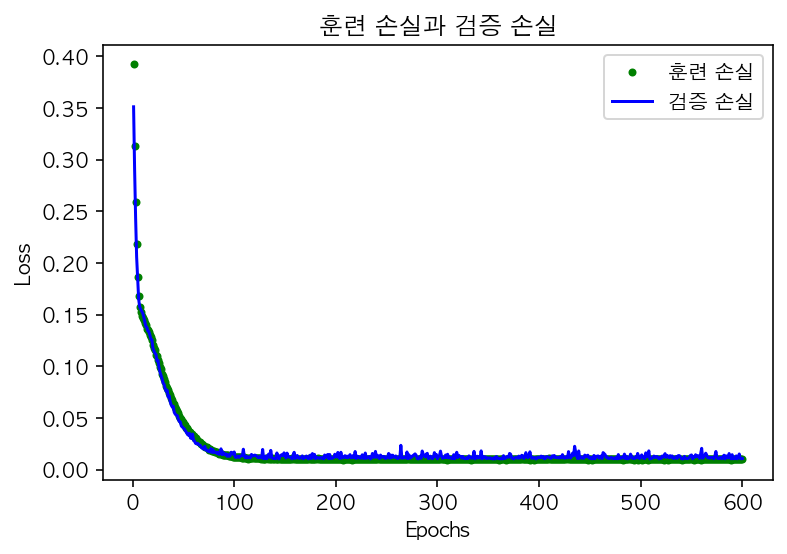

In [103]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)

show_loss_graph(loss, val_loss, epochs)

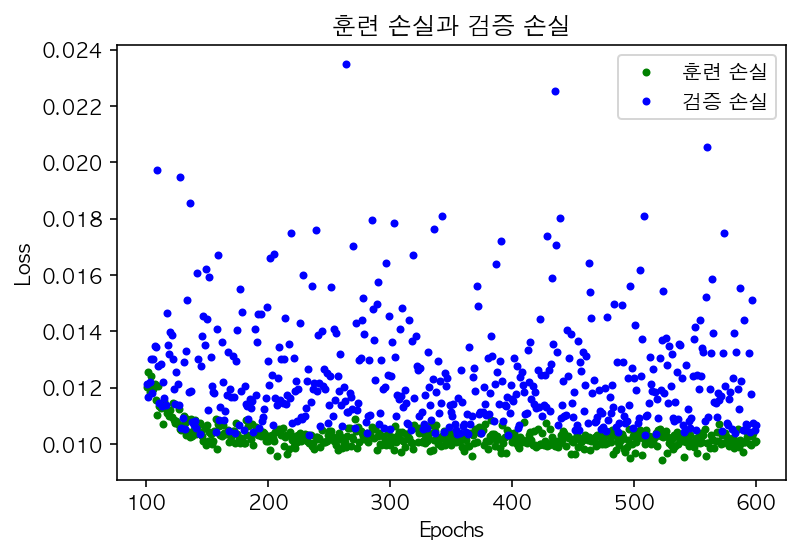

In [104]:
show_skip_loss_graph(loss, val_loss, epochs)

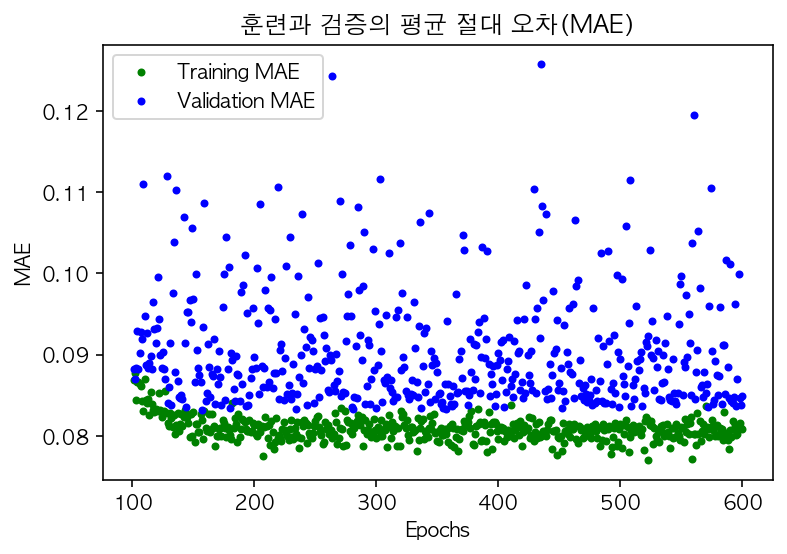

In [108]:
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.clf()
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('훈련과 검증의 평균 절대 오차(MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 540us/step - loss: 0.0103 - mae: 0.0835


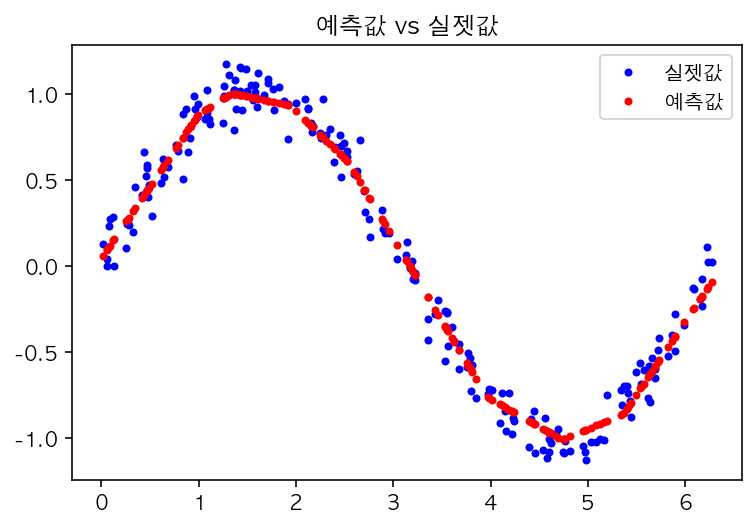

In [110]:
loss = model_2.evaluate(x_test, y_test)

predictions = model_2.predict(x_test)

plt.clf()
plt.title('예측값 vs 실젯값')
plt.plot(x_test, y_test, 'b.', label='실젯값')
plt.plot(x_test, predictions, 'r.', label='예측값')
plt.legend()
plt.show()
